# Importing Libraries

In [1]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

# Loading Dataset

### I am using Pandas dataframe to load data from CSV file.

In [2]:
## Importing dataset as dataframe

train_dataset = pd.read_csv("/Football/train.csv")
test_dataset = pd.read_csv("/Football/test-3.csv")


## Data Understanding

Usually when I start a project, I start by understanding the features and nuances of the data which helps me develop an intutive sense of the data i.e. what I expected and what was the actual outcome. 

In [3]:
## Checking for null values in dataset

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12789 entries, 0 to 12788
Data columns (total 19 columns):
AC          12780 non-null float64
AF          12778 non-null float64
AR          12780 non-null float64
AS          12780 non-null float64
AST         12780 non-null float64
AY          12780 non-null float64
AwayTeam    12782 non-null object
Date        12782 non-null object
FTR         12782 non-null object
HC          12780 non-null float64
HF          12778 non-null float64
HR          12780 non-null float64
HS          12780 non-null float64
HST         12780 non-null float64
HTAG        12779 non-null float64
HTHG        12779 non-null float64
HY          12779 non-null float64
HomeTeam    12782 non-null object
league      12789 non-null object
dtypes: float64(14), object(5)
memory usage: 1.9+ MB


In [4]:
## Checking for null values in dataset

test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 20 columns):
index       1826 non-null int64
AC          1826 non-null int64
AF          1826 non-null int64
AR          1826 non-null int64
AS          1826 non-null int64
AST         1826 non-null int64
AY          1826 non-null int64
AwayTeam    1826 non-null object
Date        1826 non-null object
HC          1826 non-null int64
HF          1826 non-null int64
HR          1826 non-null int64
HS          1826 non-null int64
HST         1826 non-null int64
HTAG        1826 non-null int64
HTHG        1826 non-null int64
HY          1826 non-null int64
HomeTeam    1826 non-null object
Referee     380 non-null object
league      1826 non-null object
dtypes: int64(15), object(5)
memory usage: 285.4+ KB


In [5]:
## It will tell us about the scaling of data.

train_dataset.describe()

,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HY
count,12780.000000,12778.000000,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,12778.000000,12780.000000,12780.000000,12780.000000,12779.000000,12779.000000,12779.000000
mean,4.497966,14.411802,0.140063,11.234898,4.177465,2.173552,5.791080,13.917123,0.101252,14.061033,5.268545,0.494796,0.691134,1.862431
std,2.582074,4.668766,0.377728,4.526805,2.497475,1.367718,3.012718,4.572456,0.320539,5.170604,2.872875,0.713903,0.833159,1.313217
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,0.000000,8.000000,2.000000,1.000000,4.000000,11.000000,0.000000,10.000000,3.000000,0.000000,0.000000,1.000000
50%,4.000000,14.000000,0.000000,11.000000,4.000000,2.000000,5.000000,14.000000,0.000000,14.000000,5.000000,0.000000,0.000000,2.000000
75%,6.000000,17.000000,0.000000,14.000000,6.000000,3.000000,8.000000,17.000000,0.000000,17.000000,7.000000,1.000000,1.000000,3.000000
max,19.000000,34.000000,3.000000,39.000000,20.000000,9.000000,21.000000,38.000000,3.000000,43.000000,24.000000,5.000000,5.000000,8.000000


## Lets Visualize the correlation matrix using seaborn library.

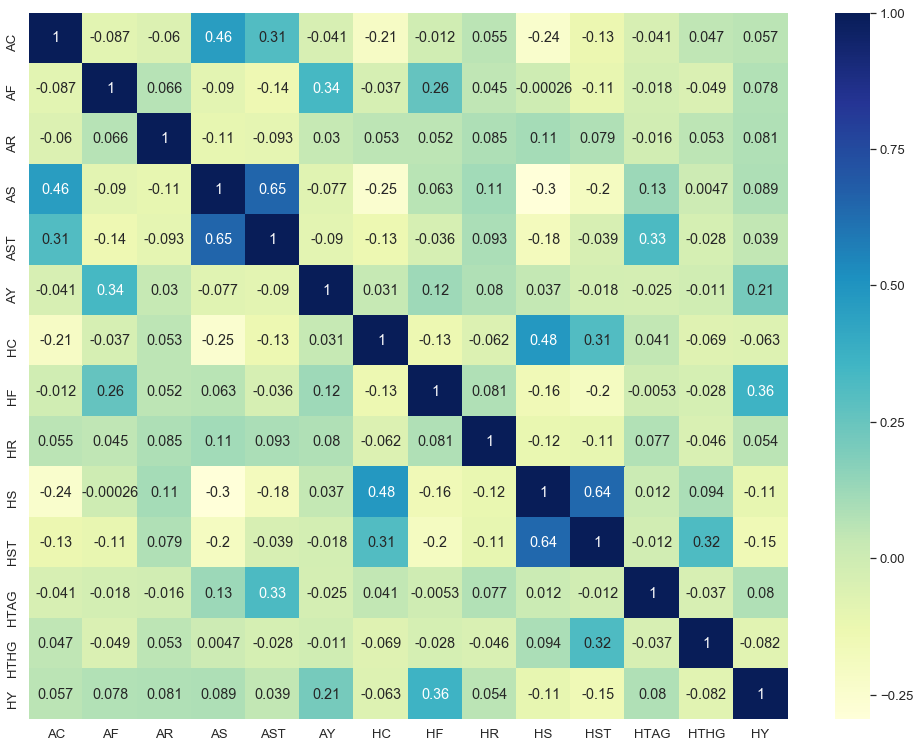

In [6]:
## Lets check the correlation between attributes
plt.figure(figsize = (17 , 13))
sns.set(font_scale=1.2)
sns.heatmap(train_dataset.corr() , annot = True , cbar_kws={"orientation": "vertical"} , cmap="YlGnBu")
plt.show()

## This Graph shows that how many instances we have for each class that we have to predict.

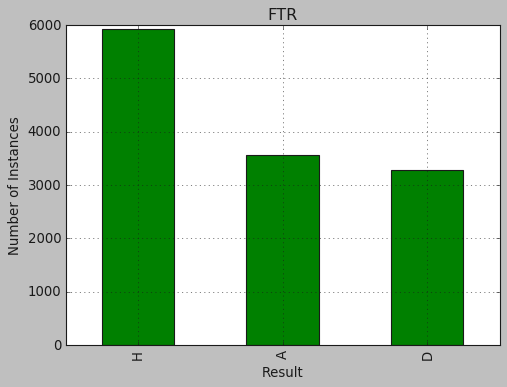

In [7]:
## Our dataset is not equal
## We have more instances of Home Win so there is possibility that our model will be little bit 
## biased towards H label.

mpl.style.use('classic')

plt.xlabel('Result')
plt.ylabel('Number of Instances')

plt.title('FTR')
plt.grid()

train_dataset["FTR"].value_counts().plot(kind = "bar" , figsize = (7 , 5) , grid = True , color = ["green"])

## This Graph shows taht how many null values each attribute has.

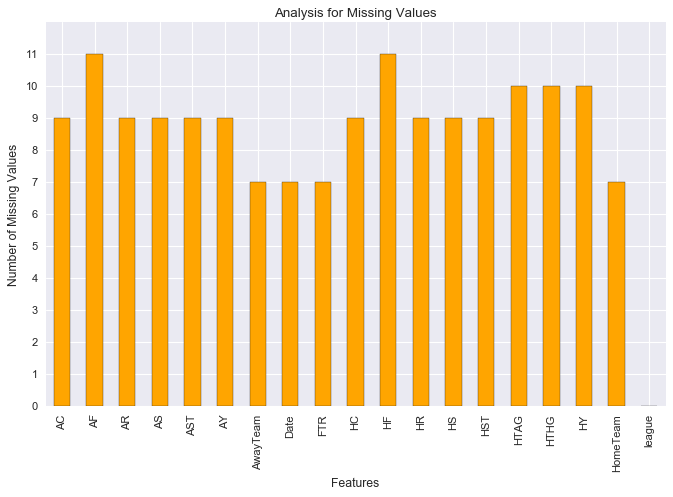

In [8]:
## As we cam see that Almost every column has NaN values
## Total number of rows = 12789
## As we can see from dataset.info() that how many non null values we have.

mpl.style.use('seaborn')

plt.xlabel('Features')
plt.ylabel('Number of Missing Values')

plt.title('Analysis for Missing Values')

train_dataset.isna().sum().plot(kind = "bar" , figsize = (10 , 6) , grid = True , color = ["orange"] , 
                          yticks = (np.arange(0, 12, step=1)))



# Handling Missing Values 

In [9]:
## Lets just see which rows have NaN values
null_columns = train_dataset.columns[train_dataset.isnull().any()]

train_dataset[train_dataset.isnull().any(axis=1)][null_columns]

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam
5620,5.0,NaN,0.0,6.0,3.0,3.0,Marseille,18/09/11,H,3.0,NaN,0.0,10.0,5.0,0.0,2.0,0.0,Lyon
5733,1.0,NaN,0.0,9.0,3.0,5.0,Nancy,17/12/11,A,8.0,NaN,0.0,9.0,1.0,1.0,0.0,2.0,Caen
7082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7408,NaN,NaN,NaN,NaN,NaN,NaN,Lyon,16/04/17,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastia
9363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11298,NaN,NaN,NaN,NaN,NaN,NaN,Roma,23/09/12,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagliari
11644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11894,5.0,16.0,0.0,10.0,1.0,5.0,Juventus,02/03/15,D,1.0,11.0,1.0,8.0,3.0,0.0,0.0,NaN,Roma


### Here I am removing Indices where almost all columns are missing or having NaN values.

In [10]:
## As we can see that rows which are completely empty except league column which 
## will give us nothing if there is no HomeTeam, AwayTeam, FTR etc.

## Indices of almost empty rows are: 7082 , 9363 , 11644 , 11645 , 11646 , 12027 , 12408
## So we should drop these rows.

train_dataset = train_dataset.drop([7082 , 9363 , 11644 , 11645 , 11646 , 12027 , 12408])

In [11]:
## Now checking again for rows containg NaN values
train_dataset[train_dataset.isnull().any(axis=1)][null_columns]

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam
5620,5.0,NaN,0.0,6.0,3.0,3.0,Marseille,18/09/11,H,3.0,NaN,0.0,10.0,5.0,0.0,2.0,0.0,Lyon
5733,1.0,NaN,0.0,9.0,3.0,5.0,Nancy,17/12/11,A,8.0,NaN,0.0,9.0,1.0,1.0,0.0,2.0,Caen
7408,NaN,NaN,NaN,NaN,NaN,NaN,Lyon,16/04/17,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastia
11298,NaN,NaN,NaN,NaN,NaN,NaN,Roma,23/09/12,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagliari
11894,5.0,16.0,0.0,10.0,1.0,5.0,Juventus,02/03/15,D,1.0,11.0,1.0,8.0,3.0,0.0,0.0,NaN,Roma
12426,7.0,21.0,0.0,15.0,5.0,2.0,Pescara,28/08/16,A,2.0,12.0,0.0,13.0,3.0,NaN,NaN,2.0,Sassuolo


In [12]:
## We can see that row numbers(index label) 7408 and 11298 contains only HomeTeam, AwayTeam and Date values.
## We are dropping that too

## Also we are not using AF and HF so row numbers(index label) 5620 and 5733 won't bother us.
## We are also not considering HY so row numbers(index label) 11894 won't bother us.

## for index label 12426 HTAG and HTHG are Null, since the FTR is A that means that there is a possibility that 
## in half time AwayTeam goals are more than HomeTeam, But it is also possible that the HomeTeam Sccored well 
## in the second half, To be fair with our model lets assign both 0.0 and 0.0

train_dataset = train_dataset.drop([7408 , 11298])
train_dataset['HTAG'] = train_dataset['HTAG'].fillna(0.0)
train_dataset['HTHG'] = train_dataset['HTHG'].fillna(0.0)
train_dataset = train_dataset.reset_index(drop = True)



<hr>


So what do we gather from the data so far? We have narrowed down the correlation of features with the label. Futhermore, we have concluded that there is no need for us to rush into upsampling the data, something I did try using SMOTE (code given in a commented out block below)

Furthermore, I had an intution that I will find some sort of seasonality in the data i.e. teams performing better or worse depending upon the data. However, I concluded that the date casted a minute shadow on our result and events from recent past had a more prominent correlation which the outcome of a match. 

For instance, the how the Home team has performed on their home ground in, say, the past 5 matches or it's track record against a team in a given league carried a higher weight than the weight of 'Date' as an attribute itself.

Through this inspection, I decided to use the date attribute as an index rather than a feature for training the Random Forest Classifier. My decision was backed by the information gain chart when I trained a random forest classifier as a base line using all the attributes available.

<hr> 


## Fetaure Extraction

### Here I am extracting a new feature which is GoalDifference.
### This column contains the absolute difference between HTAG(Half Time AwayTeam Goals) and HTHG(Half Time HomeTeam Goals) column.

In [13]:
## Feature Extraction:
## I am creating one more feature from already existing features named GoalDifference.
## GoalDifference is the ccolumn that contains absolute value of difference between HTAG and HTHG.
## If the GoalDifference is 0 then there is a high possibility that match can be draw.
## If its not empty then maybe we will get one winner.

train_dataset["GoalDifference"] = train_dataset.apply(lambda x : abs(x.HTHG - x.HTAG) , axis = 1)
test_dataset["GoalDifference"] = test_dataset.apply(lambda x : abs(x.HTHG - x.HTAG) , axis = 1)

## Feature Selection

### To Train our model features that I am selecting are:
### HomeTeam, AwayTeam, HTHG, HTAG, HS, AS, HST, AST, HR, AR, league, GoalDifference 

In [14]:
## Feature Selection

## Features that we are considering are:
## HomeTeam , AwayTeam , HTHG , HTAG , HS , AS , HST , AST , HC , AC , HR , AR , league and GoalDifference
train_dataset = train_dataset[["HomeTeam" , "AwayTeam" , "HTHG" , "HTAG" , "HS" , "AS" , "HST" , "AST" , 
                    "HR" , "AR" , "league" , "GoalDifference" , "FTR"]]

In [15]:
train_dataset.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,HR,AR,league,GoalDifference,FTR
0,Wolfsburg,Stuttgart,0.0,0.0,13.0,14.0,7.0,4.0,0.0,0.0,bundesliga,0.0,H
1,Dortmund,FC Koln,0.0,0.0,24.0,7.0,11.0,0.0,0.0,0.0,bundesliga,0.0,H
2,Hertha,Hannover,0.0,0.0,10.0,15.0,4.0,3.0,0.0,0.0,bundesliga,0.0,H
3,Hoffenheim,Bayern Munich,1.0,1.0,9.0,9.0,1.0,3.0,0.0,0.0,bundesliga,0.0,D
4,Mainz,Leverkusen,1.0,2.0,8.0,13.0,4.0,7.0,0.0,0.0,bundesliga,1.0,D


## Our Response Column that is FTR has values like:

### H => HomeTeam won the match
### A => Awayteam won the match
### D => Match Draw

### I am converting these alphabets to numbers:
### H => 2
### A => 1
### D => 0

In [16]:
def label_fix(label):
    
    if label == "H":
        
        return 2
    
    elif label == "D":
        
        return 0
    
    else:
        
        return 1


In [17]:
train_dataset["FTR"] = train_dataset["FTR"].apply(label_fix)
train_dataset.head()


,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,HR,AR,league,GoalDifference,FTR
0,Wolfsburg,Stuttgart,0.0,0.0,13.0,14.0,7.0,4.0,0.0,0.0,bundesliga,0.0,2
1,Dortmund,FC Koln,0.0,0.0,24.0,7.0,11.0,0.0,0.0,0.0,bundesliga,0.0,2
2,Hertha,Hannover,0.0,0.0,10.0,15.0,4.0,3.0,0.0,0.0,bundesliga,0.0,2
3,Hoffenheim,Bayern Munich,1.0,1.0,9.0,9.0,1.0,3.0,0.0,0.0,bundesliga,0.0,0
4,Mainz,Leverkusen,1.0,2.0,8.0,13.0,4.0,7.0,0.0,0.0,bundesliga,1.0,0


## Selecting same features for Test data and understanding Test data set

In [18]:
test_dataset = test_dataset[["HomeTeam" , "AwayTeam" , "HTHG" , "HTAG" , "HS" , "AS" , "HST" , "AST" , 
                "HR" , "AR" , "league" , "GoalDifference"]]

test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
HomeTeam          1826 non-null object
AwayTeam          1826 non-null object
HTHG              1826 non-null int64
HTAG              1826 non-null int64
HS                1826 non-null int64
AS                1826 non-null int64
HST               1826 non-null int64
AST               1826 non-null int64
HR                1826 non-null int64
AR                1826 non-null int64
league            1826 non-null object
GoalDifference    1826 non-null int64
dtypes: int64(9), object(3)
memory usage: 171.3+ KB


## Converting Train dataset into Feature dataset and Label dataset

In [19]:
## Lets convert into fetaure dataset and respective labels dataset

unscaled_train_dataset = train_dataset.drop("FTR" , axis = 1)
train_labels = train_dataset["FTR"]

In [20]:
unscaled_train_dataset.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,HR,AR,league,GoalDifference
0,Wolfsburg,Stuttgart,0.0,0.0,13.0,14.0,7.0,4.0,0.0,0.0,bundesliga,0.0
1,Dortmund,FC Koln,0.0,0.0,24.0,7.0,11.0,0.0,0.0,0.0,bundesliga,0.0
2,Hertha,Hannover,0.0,0.0,10.0,15.0,4.0,3.0,0.0,0.0,bundesliga,0.0
3,Hoffenheim,Bayern Munich,1.0,1.0,9.0,9.0,1.0,3.0,0.0,0.0,bundesliga,0.0
4,Mainz,Leverkusen,1.0,2.0,8.0,13.0,4.0,7.0,0.0,0.0,bundesliga,1.0


### The major problem in preprocessing of data is to handle categorical data or non-numeric data.

#### I am using one hot encoding to convert our categorical data to numeric data.

# BUT,

#### The problem with One Hot Encoding is to handle the mismatching of columns after encoding.

#### To solve this issue here, first I am concatenating both Train dataseta nd Test dataset.

#### Then I will do the encoding and after that I will separate them into their respective dataset.

#### After this we will having same number of columns in both the dataset.

#### Also there are some teams that are present in test set but are not in train dataset so it will solve that problem too.

#### Note: This is not the optimal solution for this problem.
#### The problem will arise in production environment.
#### For that the only solution is to train our model in regular intervals of time so that it will be trained on new values of that column.

#### Also OneHotEncoding is not the best solution for features having high cardinality, if thats the case then either we have to reduce our features using PCA or to apply different algorithm.

#### Here the cardinality is low so OneHotEncoding is best here.

#### I tried with Label Encoding also but that will give special priority to some teams and will give less priority to other teams.

In [21]:
## To solve the problem of mismatch of columns after one hot encoding.

unscaled_train_dataset["train"] = 1
test_dataset["train"] = 0

combinedDataset = pd.concat([unscaled_train_dataset , test_dataset])


In [22]:
combinedDataset.shape

(14606, 13)

### One Hot Encoding of combined dataset. 

In [23]:
df = pd.get_dummies(combinedDataset[["HomeTeam" , "AwayTeam" , "league"]])

In [24]:
## 337
combinedDataset = pd.get_dummies(combinedDataset , columns = ["HomeTeam" , "AwayTeam" , "league"] , 
                                prefix = ["HomeTeam" , "AwayTeam" , "league"])

### Separating Train set and Test set from Combined dataset.

In [25]:
## Its time to separate train and test datasets

unscaled_train_df = combinedDataset[combinedDataset["train"] == 1]
unscaled_test_df = combinedDataset[combinedDataset["train"] == 0]

unscaled_train_df = unscaled_train_df.drop(["train"] , axis = 1)
unscaled_test_df = unscaled_test_df.drop(["train"] , axis = 1)



In [26]:
unscaled_train_df.shape


(12780, 346)

In [27]:
unscaled_test_df.shape

(1826, 346)

In [28]:
train_labels.shape

(12780,)

## Its Time to Scale our Data

### For scaling I am using scikit learn's MinMaxScaler

In [29]:
## Scaling the dataset

scaler = MinMaxScaler()

scaled_train_array = scaler.fit_transform(unscaled_train_df)
scaled_test_array = scaler.fit_transform(unscaled_test_df)

# Scikit-Learn Random Forest

In [30]:
## Converting train labels to array

train_labels_array = np.array(train_labels)

### Splitting Train Dataset into :
### 90% Training Dataset
### 10% Test Dataset

In [31]:
## Splitting dataset into train and test set

train_features , test_features , train_labels , test_labels = train_test_split(scaled_train_array , train_labels_array , test_size = 0.1 , random_state = 42)

print("Training Features Shape: ",train_features.shape)
print("Training Labels Shape: ",train_labels.shape)
print("\nTesting Features Shape: ",test_features.shape)
print("Testing Labels Shape: ",test_labels.shape)



Training Features Shape:  (11502, 346)
Training Labels Shape:  (11502,)

Testing Features Shape:  (1278, 346)
Testing Labels Shape:  (1278,)


## For this problem statement We will be using Random Forest Algorithm.

## This is our actual Random Forest Classifier

In [32]:
## Train the Model

from sklearn.metrics import precision_score , recall_score , f1_score , roc_auc_score , accuracy_score , classification_report , confusion_matrix

forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
forest.fit(train_features , train_labels)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<hr> 
Since the dataset is extremely balanced, we don't need to perform any up-sampling or down-sampling during cross-validation. Furthermore, we don't need to assign any class weights if we choose to implement models with no training parameters like weights (decision trees or random forest). 

I understand that the Win rate is considerably more than the Lose rate, but **since we are viewing with repect to the home team, this hike is expected**. I didn't check for AwayTeam as logically, both of them should be equal in ratio.

Nonetheless, I did tried using upsampling to: a) generate more data poins for training. b) balance the classes without using class weights in Random Forest Classifier. 

One mistake that I was making earlier was to undersample and oversample the data before cross-validation (CV). This wasn't intuitive and took some pondering before we figured out where we were going wrong. It seem obvious in retrospect if we think about how CV works. For instance, if splits = 3, 1/3 is validation set and 2/3 is used to train. Ideally, the 1/3 should not be touched before we start the training process. This is not preserved if we perform upsampling/downsampling before CV. The phenomena is called "data-leakage" and is explained over at [Machine Learning Mastery](https://machinelearningmastery.com/data-leakage-machine-learning/)


**It gave a similar Accuracy and marginal improvement in the F1-Score.**

<hr>

In [33]:
# from sklearn.model_selection import StratifiedKFold 
# from imblearn.over_sampling import SMOTE

# train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# for i, j in train_test_splits.split(X, y):
#   X_train, X_test = X.iloc[i], X.iloc[j]
#   y_train, y_test = y.iloc[i], y.iloc[j]
  
  
# accuracy = []
# precision = []
# recall = []
# f1 = []
# auc = []
  
# forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=90, max_features=3, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=3, min_samples_split=10,
#             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

# for train_index, test_index in train_test_splits.split(X_train, y_train):
  
#     print("Training index: ", train_index, "Validation Index: ", test_index)
#     pipeline = make_pipeline(SMOTE(sampling_strategy='all'), forest)
    
#     # print(X_train.iloc[train_index], y_train.iloc[train_index])
#     model = pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    
#     prediction = forest.predict(X_train.iloc[test_index])
    
#     accuracy.append(pipeline.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    
    
# print('')
# print("Accuracy: ", np.mean(accuracy))

# predictions = forest.predict(X_test)
# print(forest.score(X_test, y_test))
# print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))

## Lets do some predictions

In [34]:
#### MAKE PREDICTIONS ON TEST SET

predictions = forest.predict(test_features)

### CALCULATE THE ABSOLUTE ERRORS
errors = abs(predictions - test_labels)

### PRINT THE MEAN ABSOLUTE ERROR
print("Mean Absolute Error : ",round(np.mean(errors) , 2) , 'degrees')



Mean Absolute Error :  0.55 degrees


## Accuracy of our Model

### The accuracy is not very good as I am getting only 63% accuracy, max 66% with Tensor Flow.


In [35]:
# ### DETERMINING PERFORMANCE METRICS

# mape = 100 * (errors / test_labels)

# ### CALCULATE AND DISPLAY ACCURACY

# accuracy = 100 - np.mean(mape)
# print("Accuracy: " , np.round(accuracy , 2) , '%')

print("Test Accuracy  :: ", accuracy_score(test_labels, predictions))

Test Accuracy  ::  0.6314553990610329


In [36]:
## Lets see the predicctions

for i in range(0, 30):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_labels)[i], predictions[i]))

Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 0 and Predicted outcome :: 2
Actual outcom

In [37]:
# ### VISUALIZATION A SINGLE DECISION TREE

## In my mac there is some Issue with the path but you can visualize from these line of codes.

# from sklearn.tree import export_graphviz
# import pydot

# #fetaure_list = list(unscaled_train_df.columns)

# ## PULL OUT ONE TREE FROM THE FOREST
# big_tree_1 = forest.estimators_[5]

# ## EXPORT THE IMAGE TO A DOT FILE
# export_graphviz(big_tree_1 , out_file = 'sahajProjectTree.dot' , feature_names = feature_list , rounded = True , precision = 2)

# ## USE DOT FILE TO CREATE A GRAPH
# (graph, ) = pydot.graph_from_dot_file('sahajProjectTree.dot')

# ## WRITE GRAPH TO A PNG FILE
# graph.write_png('sahajProjectTree.png')



## Confusion Matrix

In [38]:
print(" Confusion matrix \n", confusion_matrix(test_labels, predictions))


 Confusion matrix 
 [[ 19  63 229]
 [ 12 215 142]
 [  3  22 573]]


## Variable Importance

In [41]:


# ### VARIABLE IMPORTANCES

# ### GET NUMERICAL FEATURE IMPORTANCES
# importances = list(forest.feature_importances_)

# ## LIST OF TUPLE WITH VARIABLE AND IMPORTANCE
# feature_importances = [(feature , round(importance , 2)) for feature , importance in zip(feature_list , importances)]

# ### SORT THE FEATURE IMPORTANCES BY MOST IMPORTANT FIRST
# feature_importances = sorted(feature_importances , key = lambda x: x[1] , reverse = True)

# ### PRINT OUT THE FEATURE AND IMPORTANCES
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

fetaure_list = list(unscaled_train_df.columns)

feature_imp = pd.Series(forest.feature_importances_ , index = fetaure_list).sort_values(ascending=False)
feature_imp

HTHG                           0.175324
HTAG                           0.143451
HST                            0.119737
AST                            0.094740
GoalDifference                 0.082614
AS                             0.038022
HS                             0.031917
AR                             0.015539
HR                             0.015197
AwayTeam_Real Madrid           0.007769
AwayTeam_Barcelona             0.006526
AwayTeam_Bayern Munich         0.005502
HomeTeam_Barcelona             0.005430
HomeTeam_Real Madrid           0.005193
AwayTeam_Juventus              0.003891
HomeTeam_Bayern Munich         0.003787
AwayTeam_Paris SG              0.003598
HomeTeam_Man United            0.003202
AwayTeam_Man City              0.003114
AwayTeam_Man United            0.003009
AwayTeam_Chelsea               0.002593
HomeTeam_Pescara               0.002363
HomeTeam_Roma                  0.002239
HomeTeam_Man City              0.002227
AwayTeam_Roma                  0.002189


No handles with labels found to put in legend.


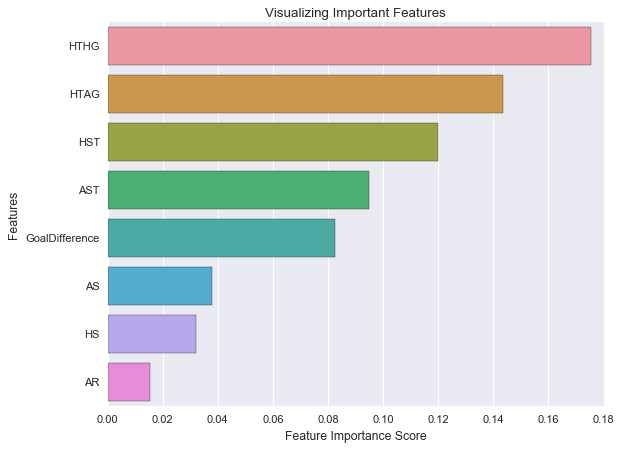

In [42]:
# Creating a bar plot
feature_imp = feature_imp.iloc[0:8]

plt.figure(figsize = (8 , 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Saving and Loading Model on Disk and Predicting on test dataset.


In [43]:
## Saving Model

import pickle

filename = 'randomForestModelSahaj.sav'
pickle.dump(forest, open(filename, 'wb'))


In [44]:
## Load the model from disk

load_model = pickle.load(open(filename, 'rb'))

test_data_predictions = load_model.predict(scaled_test_array)

test_data_predict = [("H" if i == 2 else ("A" if i == 1 else "D")) for i in test_data_predictions]

In [45]:
test_data_predict

['H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'D',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'D',
 'A',
 'H',
 'A',
 'H',
 'H',
 'H',
 'A',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'D',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'A',
 'A',
 'H'

In [46]:
test_data_predictions

array([2, 2, 2, ..., 1, 2, 2])

In [47]:
len(test_data_predict)

1826

## Concatenating predicctions with test dataset and converting it into csv file.

In [48]:
test_dataset_df = pd.read_csv("/Football/test-3.csv")
prediction_df = pd.DataFrame({'Prediction':test_data_predict})

final_predicted_dataset = pd.concat([test_dataset_df , prediction_df] , axis = 1)

In [49]:
final_predicted_dataset.head()

,index,AC,AF,AR,AS,AST,AY,AwayTeam,Date,HC,...,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,Referee,league,Prediction
0,0,5,17,0,19,4,2,Leverkusen,18/08/17,4,...,0,13,8,0,2,1,Bayern Munich,NaN,bundesliga,H
1,1,7,16,0,13,1,3,Augsburg,19/08/17,3,...,0,11,5,0,1,4,Hamburg,NaN,bundesliga,H
2,2,1,12,0,9,2,1,Stuttgart,19/08/17,5,...,0,10,3,0,0,2,Hertha,NaN,bundesliga,H
3,3,4,15,0,11,2,3,Werder Bremen,19/08/17,6,...,0,14,3,0,0,1,Hoffenheim,NaN,bundesliga,H
4,4,1,14,0,6,2,5,Hannover,19/08/17,13,...,0,14,6,0,0,3,Mainz,NaN,bundesliga,H


In [50]:
## Converting Final Dataset into CSV file.

final_predicted_dataset.to_csv("/Users/jaskirat/Desktop/FootbalPrediction.csv")